# Example of Running *High-Speed Scooping*

## 1. Connect to UR10 robot arm

**1.1 Import the urx package from the local directory**

Add the path /high_speed_scooping to the python environment at the first index

In [ ]:
import sys
sys.path.insert(0,'..') 

Import the package. A message "importing urx from /high_speed_scooping" will show up if you are import the local urx package

In [ ]:
import urx

**1.2 Create an ur10 object for accessing the APIs**

Create a *Robot* object named `ur` with the IP address of your robot

In [ ]:
ur = urx.Robot("192.168.1.10", use_rt=True) 

Get the current pose of the robot and print it to verify your connection. Check if the printed coordinate matches with your robot

In [ ]:
pose = ur.get_pose()
print(pose)

## 2. Connect to the direct-drive gripper

**2.1 Download driver package of our direct-drive hand**

```shell
cd high_speed_scooping
git clone https://github.com/HKUST-RML/ddh_driver
cd ddh_driver
pip3 install -r requirements.txt
```

**2.2 Create a gripper object for accessing the APIs**

Import the *pyddh* module 

In [ ]:
import sys
sys.path.append('../ddh_driver')
import pyddh

Create a *Gripper* object named `gripper` with the config file name: "default" in `/ddh_driver/config`

In [ ]:
gripper = Gripper("default")

**2.3 Test the gripper's connection and motors' control**

Start the controller and the motors will hold its position.

In [ ]:
gripper.arm()

Check if all the four motors are working. If not, turn off the power supply of the *Odrive* motor driver and secure the encoder's wires connection. Then, turn on the power supply and restart the program.

You can set the position of fingertips by running

In [ ]:
gripper.set_left_tip((150,0))
gripper.set_right_tip((150,0))

To turn off the motors' control, run:

In [ ]:
gripper.disarm()

## 3. Execute *High-Speed Scooping*

**3.1 Import the *high-speed scooping* module**

Import the class *HighSpeedScooping* from the module *scooping_primitives*

In [ ]:
from scooping_primitives import HighSpeedScooping 

Create a *HighSpeedScooping* object named `scoop` with the object `ur`, `gripper`, and config file name: "hss" in `/config`

In [ ]:
scoop = HighSpeedScooping(ur, gripper, "hss")

**3.2 Execute the task**

First, set the pose of both the robot and gripper above the object with the following parameters for example:

2D pose of the object located at `x = -0.5 (meter)`, `y = 0.5 (meter)`, and the orientation: `angle_relative_to_x_axis = 45 (degree)` in the UR10 base frame
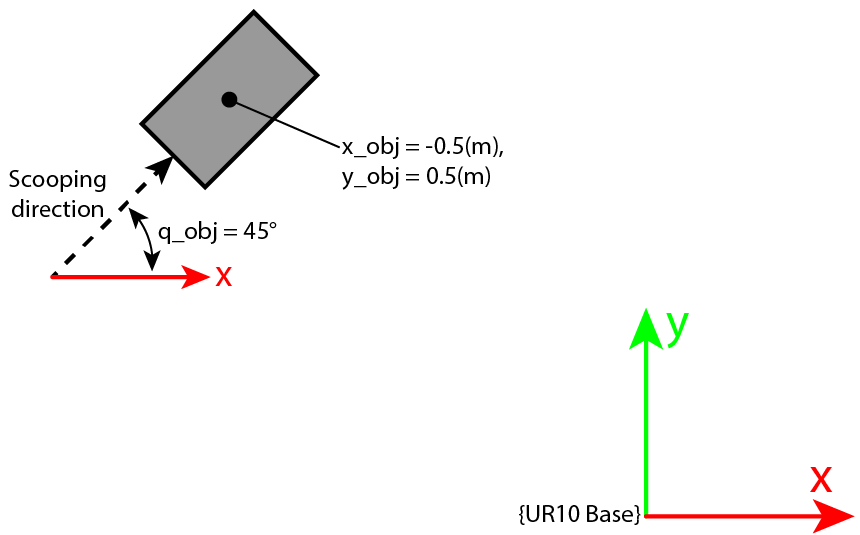

In [ ]:
x_obj = -0.5
y_obj = 0.5
q_obj = 45
scoop.initialize_pose((x_obj, y_obj, q_obj))

The picking motion will then be executed as follows:
1. The arm accelerates towards the surface
2. The gripper detects the collision with the motors and close the digits to scoop up the object
3. The robot moving down accelerates upward to take the gripper off from the surface

with the function below:

In [ ]:
scoop.simple_scoop()

The parameters of *HighSpeedScooping*, such as object's dimensions, arm's speed, digit stiffness, etc., can be changed in [`/config/hss.yaml`](../config/hss.yaml)